# Introduction to Qiskit Optimization
IBM Quantum, IBM Research - Tokyo

Atsushi Matsuo

## Agenda
- Optimization problems
- Qiskit Optimization
  - `QuadraticProgram` class
  - Application classes
  - `MinimumEigenOptimizer` class
- Example of solving a Max-cut problem

## Optimization problems
- Many practical problems in several fields are optimization problems.
- Optimization problems lie at the core of complex decision-making and definition of strategies.
- Searching for an optimal solution in a finite or countably infinite set of potential solutions.
- Optimality is defined with respect to some criterion function (called objective function), which is to be minimized or maximized.

## Typical objective functions
- Minimization: cost, distance, length of a traversal, weight, processing time, material, energy consumption, number of objects
  - E.g. Find the shortest path from A to B
- Maximization: profit, value, output, return, yield, utility, efficiency, capacity, number of objects
  - E.g. Production Planning



## Qiskit Optimization
- Covers the whole range of solving optimization problems
- High-level modeling of optimization problems
- Automatic conversion of problems to required representations (Ising Hamiltonian)
- Allows users to solve problems using a large set of algorithms
  - QAOA, Grover adaptive Search, Classical solvers

<div align="center">
    <img src="opt-structure.png">
</div>


## Quadratic programs
- Qiskit Optimization supports Quadratically Constrained Quadratic Programs
  - Binary, integer, and continuous variables
  - Equality and inequality constraints
$$
\begin{aligned}
\text{minimize}\quad& x^\top Q_0 x + c^\top x\\
\text{subject to}\quad& A x \leq b\\
& x^\top Q_i x + a_i^\top x \leq r_i, \quad 1,\dots,i,\dots,q\\
& l_i \leq x_i \leq u_i, \quad 1,\dots,i,\dots,n,
\end{aligned}
$$
    where $Q_i$ are $n \times n$ matrices, $A$ is a $m \times n$ matrix , $x$, and $c$ are $n$-dimensional vectors

- Simple example of quadratic program
$$
\begin{aligned}
\text{maximize}\quad& 2xy+x+y+z\\
\text{subject to}\quad& x+y+z \leq 2\\
& x,y,z \in \{0,1\} \\
\end{aligned}
$$
  

- Covers various types of problems
  - Traveling salesman problem (TSP), Max cut, Vertex cover, Knapsack problem, and so on.
- Qiskit introduces the `QuadraticProgram` class to make a model of an optimization model.

## Modeling optimization problems
- Directly constructing a `QuadraticProgram`
- Loading a `QuadraticProgram` from a classical optimization solvers (Docplex and Gurobipy)
- Loading a `Quadratic Program` from an LP file

In [1]:
from qiskit_optimization import QuadraticProgram
# Define QuadraticProgram
qp = QuadraticProgram()
# Add variables
qp.binary_var('x')
qp.binary_var('y')
qp.integer_var(lowerbound=0, upperbound=7, name='z')
# Add an objective function 
qp.maximize(linear={'x': 2, 'y': 1, 'z': 1})
# Add a constraint
qp.linear_constraint(linear={'x': 1, 'y': 1, 'z': 1}, sense='LE', rhs=2, name='xyz_leq')
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Maximize
 obj: 2 x + y + z
Subject To
 xyz_leq: x + y + z <= 2

Bounds
 0 <= x <= 1
 0 <= y <= 1
       z <= 7

Binaries
 x y

Generals
 z
End



## Converting `QuadraticProgram` to an Ising Hamiltonian
- `QuadraticProgram` class is generic and powerful representation for optimization problems.
- However, quantum algorithms can not handle `QuadraticProgram`, directly.
  - Need to convert problems into Quadratic Unconstrained Binary Optimization (QUBO) problems, and eventually Ising Hamiltonians.
  - QUBO: QuadraticProgram, but no constraints
  - Ising Hamiltonian: $H = \sum_i w_i Z_i + \sum_{i<j} w_{ij} Z_i Z_j$ where $Z_i$ is the pauli Z operator
  ![converter](converter.png)
  
- Qiskit offers a variety of converters, and automatically convert problems to Ising Hamiltonians.
  - Users do not need to bother with complicated conversion process.

## Minimum Eigen Optimizer
- Finding the solution to a QUBO is equivalent to finding the ground state (the minimum eigen value, and minimum eigen vector) of a corresponding Ising Hamiltonian
- Qiskit offers a `MinimumEgenOptimizer` for that purpose.
- Can choose a variety of solving methods such as
  - `QAOA`
  - `VQE`
  - `CplexSolver` (classical exact method) 

## Application classes
- Qiskit offers applications classes for several optimization problems.
  - e.g. Max-cut problem, Traveling salesman problem, Exact cover problem Knapsack problem, and so on.
- Users can easily make various optimization problems and try to solve them with quantum computers. 

## Example of solving a Max-cut problem with QAOA

## Max-cut problem
- NP-complete problem, known as classically intractable problem
- Applications in clustering, network science, statical physics, and so on. 
- Formal definition of the problem is as follows:
  - Consider $n$-node undirected graph $G=(V, E)$ where $|V|=n$ with edge weights $w_{ij} > 0, w_{ij}=w_{ji}, for (i,j) \in E$
  - Cut is defined as a partition of the original set $V$ into two subsets.
  - Objective function to be optimized is the sum of weights of edges connecting nodes in the two different subsets, *crossing* the cut. 
  $$ \text{maximize} \sum_{i,j} w_{ij} x_i (1-x_j)+\sum_i w_i x_i. $$
  - No constraints

## What do we want to do?
- Divide nodes into two subsets
- Maximize the number of edges connecting nodes in the two different subsets
<img src="max-cut-example.png" width=50%>

Ref: https://en.wikipedia.org/wiki/Maximum_cut

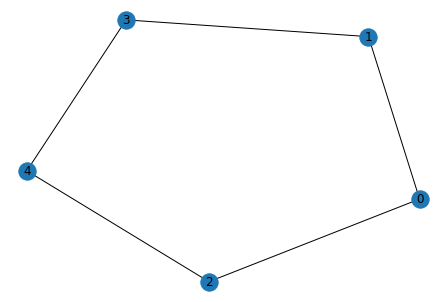

In [10]:
import networkx as nx
# Make a graph with degree=2 and #node=5
graph = nx.random_regular_graph(d=2, n=5, seed=111)
pos = nx.spring_layout(graph, seed=111)
# Application class for a Max-cut problem
# Make a Max-cut problem from the graph
from qiskit_optimization.applications import Maxcut
maxcut = Maxcut(graph)
maxcut.draw(pos=pos)

In [11]:
# Make a QuadraticProgram by calling to_quadratic_program()
qp = maxcut.to_quadratic_program()
print(qp)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 2 x_0 + 2 x_1 + 2 x_2 + 2 x_3 + 2 x_4 + [ - 4 x_0*x_1 - 4 x_0*x_2
      - 4 x_1*x_3 - 4 x_2*x_4 - 4 x_3*x_4 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End



Solving it with QAOA

result:
 optimal function value: 4.0
optimal value: [0. 1. 1. 0. 0.]
status: SUCCESS

solution:
 [[0, 3, 4], [1, 2]]

time: 0.04050087928771973


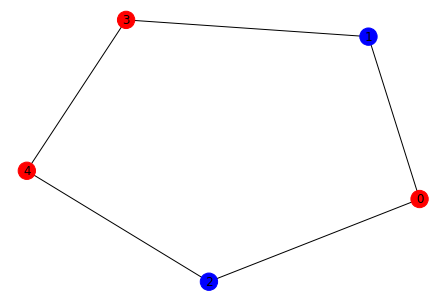

In [12]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver

qins = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1000, seed_simulator=123)
# Define QAOA solver
meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=qins))
result = meo.solve(qp)
print('result:\n', result)
print('\nsolution:\n', maxcut.interpret(result))
print('\ntime:', result.min_eigen_solver_result.optimizer_time)
maxcut.draw(result, pos=pos)

Checking the solution with Numpy Eigensolver (classical optimizer)

result:
 optimal function value: 4.0
optimal value: [0. 1. 1. 1. 0.]
status: SUCCESS

solution:
 [[0, 4], [1, 2, 3]]


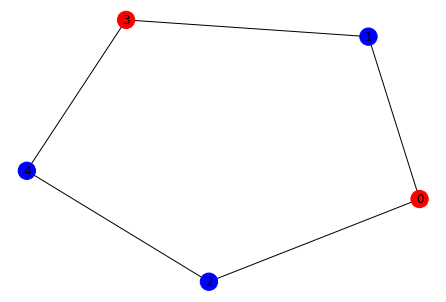

In [13]:
# Numpy Eigensolver
meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print('result:\n', result)
print('\nsolution:\n', maxcut.interpret(result))
maxcut.draw(result, pos=pos)

## Summary
- Optimization problems lie at the core of complex decision-making and definition of strategies.
  - Minimization: cost, weight,... Maximizing: profit, efficiency,...
- Qiskit Optimization covers the whole range of solving optimization problems.
  - High-level modeling of optimization problems.
  - Automatic conversion of problems to required representations (Ising Hamiltonian).
  - Pre-defined application classes to create problems, easily.
  - Allows users to solve problems using a large set of algorithms
    - QAOA, Grover adaptive Search, Classical solvers, ...
- Introduced an example of solving a Max-cut problem
  - using the application class to create a problem
  - solving it with `QAOA` and `NumpyMinimumEigensolver`